# Visualização científica

## Matplotlib

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pyplot as plt

from math import pi, cos, sin

Matplotlib é um módulo para a criação de gráficos 2D e 3D criada por [John Hunter (2007)](http://dx.doi.org/10.1109/MCSE.2007.55). Sua sintaxe é propositalmente similar às funções de plotagem da MATLAB, facilitando o aprendizado de usuários que desejem replicar gráficos construídos naquele ambiente. Com uma grande comunidade de usuários, Matplolib possui diversos [tutoriais na Web](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb). Seu site oficial apresenta uma enorme [galeria de exemplos](http://matplotlib.org/gallery.html) que permite ao pesquisador rapidamente identificar o código necessário para o tipo de gráfico que pretende utilizar.

* Biblioteca para *plotting*
* Gráficos de alta qualidade que podem ser utilizados em publicação científica
* Projetada de forma que a sintaxe de suas funções seja similar às análogas em MATLAB

### Exemplo: exibição de duas funções, $\sin (\theta)$ e $\cos (\theta)$

Considere o domínio $X$, formado por 256 pontos no intervalo $[-\pi, \pi]$, e as funções $\cos(x)$ e $\sin(x)$:

In [3]:
X = np.linspace(-pi, pi, 256)
C = np.cos(X)
S = np.sin(X)

O gráfico das duas funções pode ser facilmente exibido com a função `plot`:

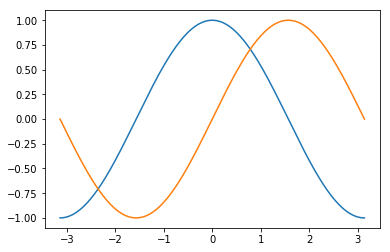

In [4]:
plt.plot(X, C)
plt.plot(X, S)

Text(0.5,1,u'Meu gr\xe1fico')

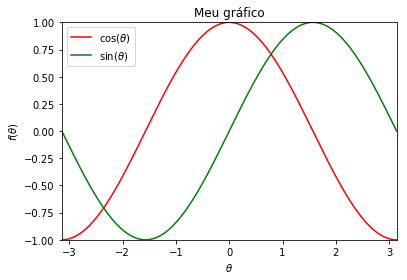

In [5]:
# Exibe as funções
plt.plot(X, C, color="red", linewidth=1.5, label=r'$\cos(\theta)$')
plt.plot(X, S, color="green", linewidth=1.5, label=r'$\sin(\theta)$')

# Limites dos eixos
plt.xlim(-pi, pi)
plt.ylim(-1, 1)

# Rótulos para os eixos
plt.xlabel(r'$\theta$')
plt.ylabel(r'$f(\theta)$')

# Adiciona a legenda
plt.legend(loc='upper left')

# Título
plt.title(u'Meu gráfico')

O exemplo acima apresenta um gráfico muito simples. Para ilustrar a grande variedade de personalizações fornecidas pela Matplotlib, é apresentado abaixo um exemplo mais complexo, uma versão modificada do código apresentado por [Rougier et al.](http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html). O leitor interessado pode obter explicações detalhadas na Seção 1.4, *[Matplotlib: plotting](http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html)*, das *SciPy Lecuture Notes*.  

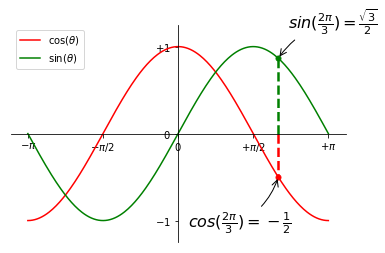

In [6]:
fig = plt.figure()
# Remover as bordas superior e inferior
ax = plt.gca()  # gca significa 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Mover os eixos e as marcas para o centro do gráfico
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

# Definie os intervalos exibidos nas oordenadas e abscissas
plt.xlim(-3.5, 3.5)
plt.ylim(-1.25, 1.25)

# Indica o texto a ser utilizado nas marcas dos eixos
plt.xticks([-pi, -pi/2, 0, pi/2, pi], [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])
plt.yticks([-1, 0, +1], [r'$-1$', r'$0$', r'$+1$'])

# Anotação de dois pontos de interesse: o seno e o cosseno de 2pi/3
theta = 2 * pi / 3
plt.plot([theta, theta], [0, cos(theta)], color='red', linewidth=2.5, linestyle="--")
plt.scatter([theta], [cos(theta)], 25, color='red')
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
            xy=(theta, sin(theta)), xycoords='data',
            xytext=(+10, +30), textcoords='offset points', fontsize=16,
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([theta, theta],[0, sin(theta)], color='green', linewidth=2.5, linestyle="--")
plt.scatter([theta, ],[sin(theta), ], 25, color='green')
plt.annotate(r'$cos(\frac{2\pi}{3})=-\frac{1}{2}$',
          xy=(theta, cos(theta)), xycoords='data',
          xytext=(-90, -50), textcoords='offset points', fontsize=16,
          arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Exibe as funções
plt.plot(X, C, color="red", linewidth=1.5, linestyle="-", label=r'$\cos(\theta)$')
plt.plot(X, S, color="green", linewidth=1.5, linestyle="-", label=r'$\sin(\theta)$')

# Adiciona a legenda
plt.legend(loc='upper left')

### Armazenamento de figuras em arquivo

Uma das funções da Matplotlib é auxiliar os pesquisadores na preparação de gráficos para publicação em periódicos. Ao preparar um manuscrito, é comum o pesquisador se deparar com orientações como esta:

> Suas figuras deveriam ser preparadas como qualidade de publicação, utilizando aplicações capazes de gerar arquivos TIFF de alta resolução (1200 dpi para linhas e 300 dpi para arte colorida ou *half-tone*. 

> In *[Preparing Your Manuscript](http://www.oxfordjournals.org/our_journals/rev/for_authors/manuscript_instructions.html#Figures%20and%20illustrations)*, Oxford Journals

Exigências como a acima podem ser facilmente atendidas pela Matplotlib, que possui uma função `savefig` capaz de exportar o gráfico para um arquivo em disco, em diversos formatos, com resolução definida pelo pesquisador:

In [7]:
fig.savefig('trig.tif', dpi=1200)

Na ausência de ilustrações *bitmap*, uma alternativa é armazenar a imagem em um formato **vetorial**, suportado por exemplos em arquivos PDF e EPS:

In [8]:
fig.savefig('trig.pdf')

### Subplots

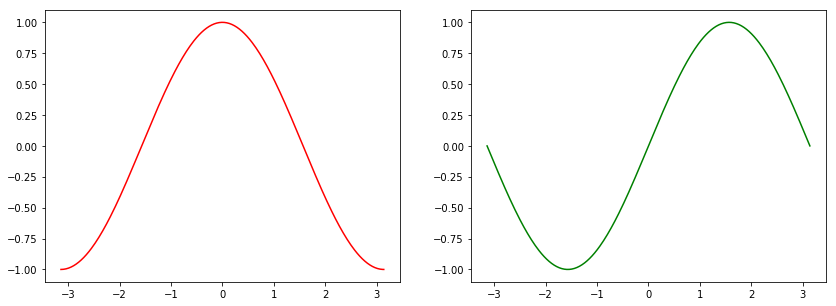

In [9]:
fig = plt.figure(figsize=(14,5))
# 1 linha, 2 colunas, posição 1
plt.subplot(1, 2, 1)
plt.plot(X, C, 'r-')
# 1 linha, 2 colunas, posição 2
plt.subplot(1, 2, 2)
plt.plot(X, S, 'g-')

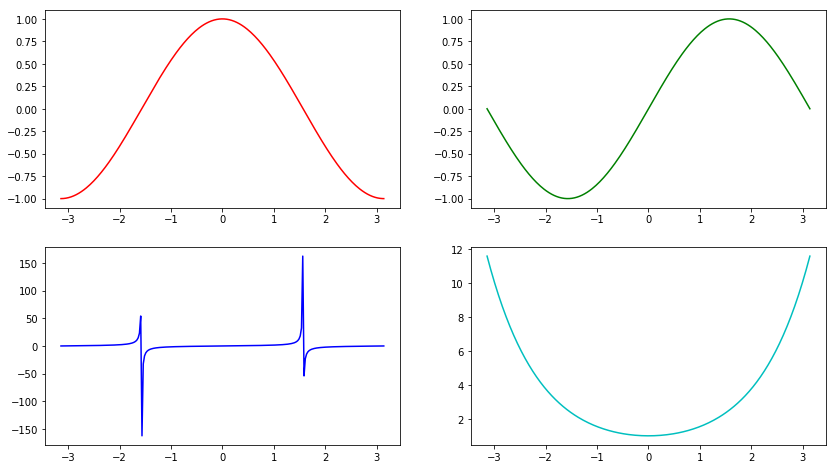

In [10]:
fig = plt.figure(figsize=(14,8))
# 2 linhas, 2 colunas, posição 1
plt.subplot(2, 2, 1)
plt.plot(X, C, 'r-')

# 2 linha, 2 colunas, posição 2
plt.subplot(2, 2, 2)
plt.plot(X, S, 'g-')

# 2 linha, 2 colunas, posição 3
plt.subplot(2, 2, 3)
plt.plot(X, [np.tan(x) for x in X], 'b-')

# 2 linha, 2 colunas, posição 4
plt.subplot(2, 2, 4)
plt.plot(X, [np.cosh(x) for x in X], 'c-')

### Outros tipos de gráficos

#### *Scatter plots*

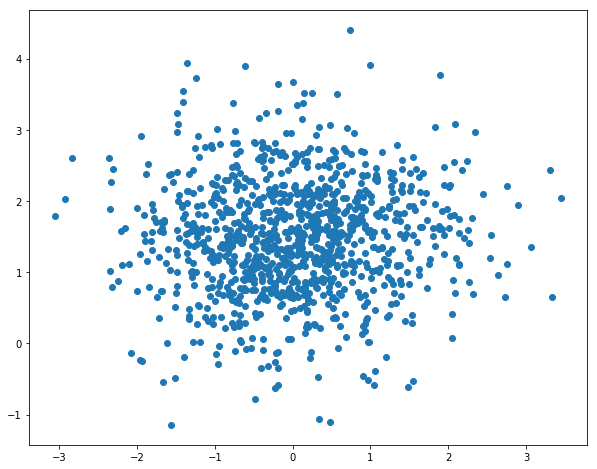

In [11]:
fig = plt.figure(figsize=(10,8))

n = 1024
X = np.random.normal(0, 1., n)
Y = np.random.normal(1.5, 0.8, n)
plt.scatter(X,Y)

#### Um clássico: *Iris Dataset*

Este conjunto de dados é famoso na literatura de reconhecimento de padrões, sendo apresentado pela primeira vez por R. A. Fisher em 1950. Nele há 3 classes
da planta *Iris*: *Iris Setosa*, *Iris Virginica* e *Iris Versicolor*. Cada classe possui 50 amostras com 4 medidas: comprimento e largura da sépala, comprimento e largura da pétala.

In [12]:
!head ./data/iris.data.txt

5.1	3.5	1.4	0.2	Iris-setosa
4.9	3.0	1.4	0.2	Iris-setosa
4.7	3.2	1.3	0.2	Iris-setosa
4.6	3.1	1.5	0.2	Iris-setosa
5.0	3.6	1.4	0.2	Iris-setosa
5.4	3.9	1.7	0.4	Iris-setosa
4.6	3.4	1.4	0.3	Iris-setosa
5.0	3.4	1.5	0.2	Iris-setosa
4.4	2.9	1.4	0.2	Iris-setosa
4.9	3.1	1.5	0.1	Iris-setosa


O código abaixo apenas carrega os dados das 3 classes de planta a partir do arquivo:

In [13]:
iris_data = np.loadtxt('./data/iris.data.txt', usecols=(0,1,2,3))
iris_class = np.loadtxt('./data/iris.data.txt', dtype='string')[:,4]

setosa = iris_data[iris_class == 'Iris-setosa']
virginica = iris_data[iris_class == 'Iris-virginica']
versicolor = iris_data[iris_class == 'Iris-versicolor']

Podemos definir o símbolo e a cor utilizada em um *scatter plot*. No exemplo abaixo, círculos vermelhos representam os dados para *Setosa*, triângulos azuis representam *Versicolor* e quadrados verdes exibem o dados de *Virginica*:

Text(0,0.5,u'largura da p\xe9tala')

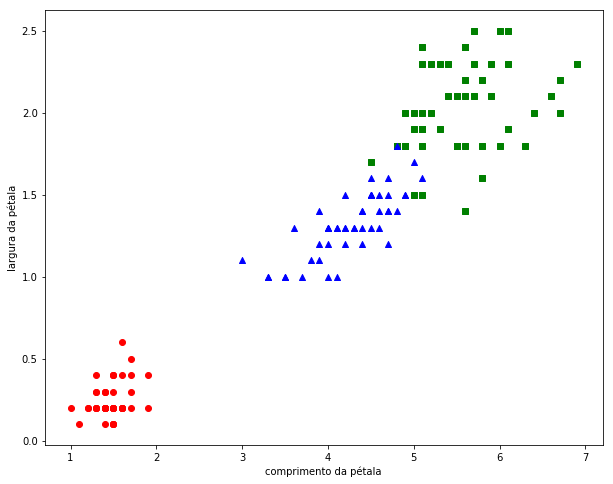

In [14]:
fig = plt.figure(figsize=(10,8))
plt.scatter(setosa[:,2], setosa[:,3], c='r', marker='o')
plt.scatter(virginica[:,2], virginica[:,3], c='g', marker='s')
plt.scatter(versicolor[:,2], versicolor[:,3], c='b', marker='^')
plt.xlabel(u'comprimento da pétala')
plt.ylabel(u'largura da pétala')

#### Imagens

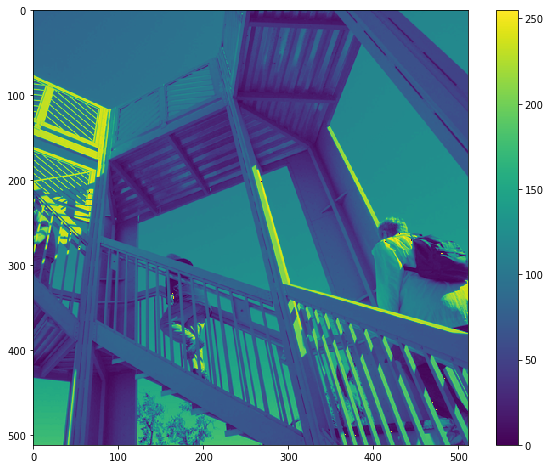

In [15]:
fig = plt.figure(figsize=(10,8))

from scipy.misc import ascent

L = ascent()
plt.imshow(L)
plt.colorbar()

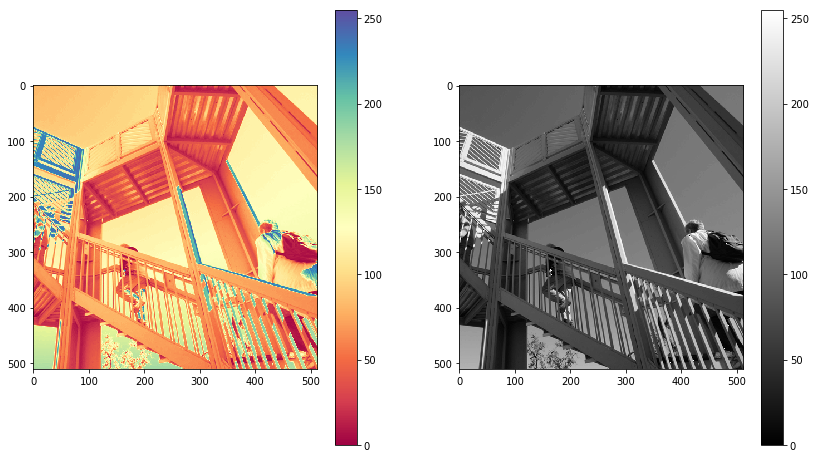

In [16]:
fig = plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(L, cmap=plt.cm.Spectral)
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(L, cmap=plt.cm.gray)
plt.colorbar()

#### Barras

In [17]:
x = np.arange(20)
y = np.random.rand(20) + 1.
print x
print y

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 1.53556809  1.03646061  1.6556676   1.78197297  1.25131967  1.41463489
  1.55195633  1.41271001  1.02081668  1.21244197  1.75744438  1.90262654
  1.55044352  1.56602648  1.51260383  1.68800007  1.40102249  1.16922631
  1.3895506   1.91372734]


<Container object of 20 artists>

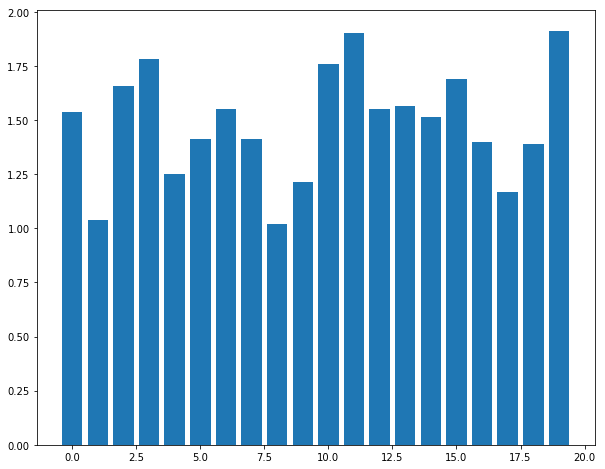

In [18]:
fig = plt.figure(figsize=(10,8))
plt.bar(x, y)

##### Um exemplo mais elaborado

([], <a list of 0 Text yticklabel objects>)

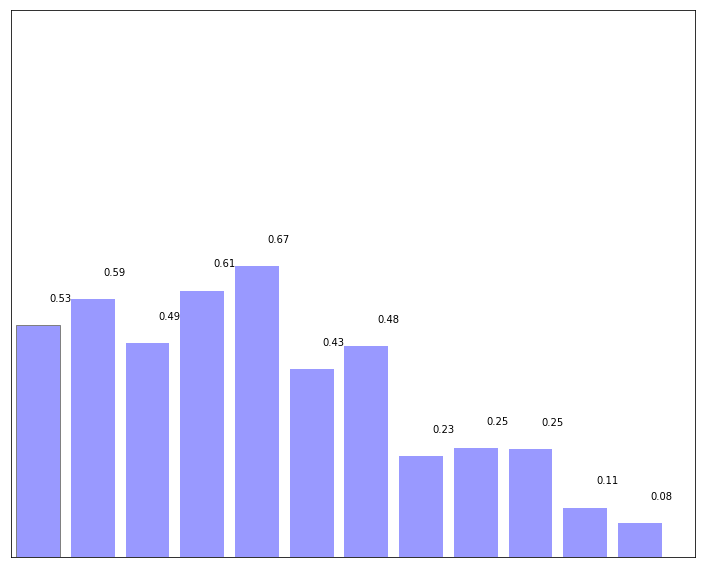

In [19]:
fig = plt.figure(figsize=(10,8))

n = 12
X = np.arange(n)
Y = (1 - X / float(n)) * np.random.uniform(0.5, 1.0, n)

plt.axes([0.025, 0.025, 0.95, 0.95])
plt.bar(X, Y, facecolor='#9999ff', edgecolor='gray')

for x, y in zip(X, Y):
    plt.text(x + 0.4, y + 0.05, '%.2f' % y, ha='center', va='bottom')

plt.xlim(-.5, n)
plt.xticks(())
plt.ylim(0, 1.25)
plt.yticks(())

#### Histogramas

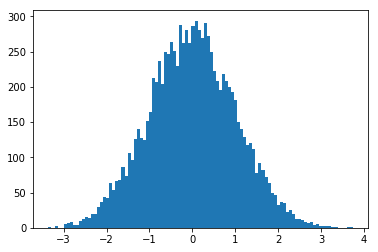

In [20]:
x = np.random.randn(10000)
n, bins, patches = plt.hist(x, 100)

### A galeria da Matplotlib

Diversos exemplos de como utilizar a Matplotlib podem ser encontrados na [galeria](http://matplotlib.sourceforge.net/gallery.html).

### Exercício 6

* Codifique alguma função $f(x)$ que achar interessante
* Utilize `plot` para exibí-la
* Leia a documentação utilizando `plot?` e varie os parâmetro para alterar seu gráfico
* Navegue pela [galeria](http://matplotlib.org/gallery.html) e veja os vários recursos oferecidos pela Matplotlib

## Matplotlib e Seaborn

* [Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn)
  * Construído sobre a Matplotlib
  * É um *complemento* que acrescenta temas, paletas e outras ferramentas à Matplotlib
  * Gráficos Seaborn podem ser modificados usando funções da Matplotlib

In [21]:
import seaborn as sns

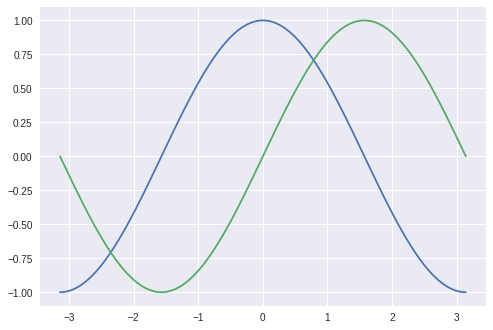

In [22]:
X = np.linspace(-pi, pi, 256)
C = np.cos(X)
S = np.sin(X)

plt.plot(X, C)
plt.plot(X, S)

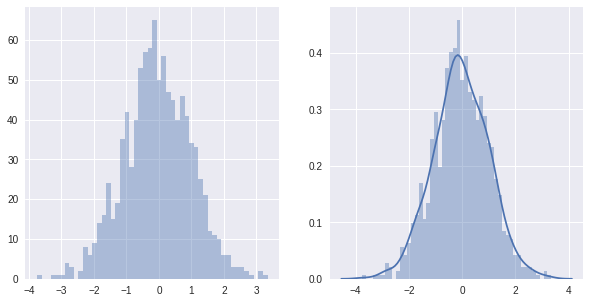

In [23]:
fig = plt.figure(figsize=(10,5))

# Dados
data = np.random.normal(0, 1., 1000)

plt.subplot(1,2,1)
sns.distplot(data, bins=50, kde=False)

plt.subplot(1,2,2)
# Exibe uma estimação Gaussiana da densidade de probabilidade
sns.distplot(data, bins=50, kde=True)

Ver a [galeria do Seaborn](http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html).

## John Hunter (1968-2012)
	
Em 28 de agosto de 2012, John D. Hunter, o criador da matplotlib, faleceu devido a complicações durante o tratamento de um câncer. Ele foi diagnosticado em julho de 2012, logo após sua palestra na conferência SciPy, falecendo em agosto do mesmo ano. 

Em retribuição a seu trabalho, a comunidade Python criou o [*John Hunter Memorial Fund*](http://numfocus.org/johnhunter/), destinado principalmente ao fomento da educação de suas três filhas.